# load and explore the dataset

In [11]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv')
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [12]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [14]:
df.isnull().sum()


,0
Years of Experience,3
Salary,5


In [15]:
df.dropna(inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


# Feature scaling (Very important for SVR)

In [17]:
from sklearn.preprocessing import StandardScaler
x = df[['Years of Experience']].values
y = df[['Salary']].values
sc_x = StandardScaler()
sc_y = StandardScaler()
x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y)


# Flatten for SVR

In [18]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [19]:
y_scaled = y_scaled.ravel()

In [20]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

# Train SVR Model(RBF Kernal)

In [21]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf',C=100,epsilon=0.1)
svr.fit(x_scaled,y_scaled)

SVR(C=100)

# Prediction and Inverse Scaling

In [23]:
y_pred_scaled = svr.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))
y_pred_scaled
y_pred

array([[ 91789.78489284],
       [ 64693.65154467],
       [176608.02755474],
       ...,
       [ 77353.48189214],
       [169394.39541345],
       [ 44722.68696322]])

# Visualization:Actual vs Predicted

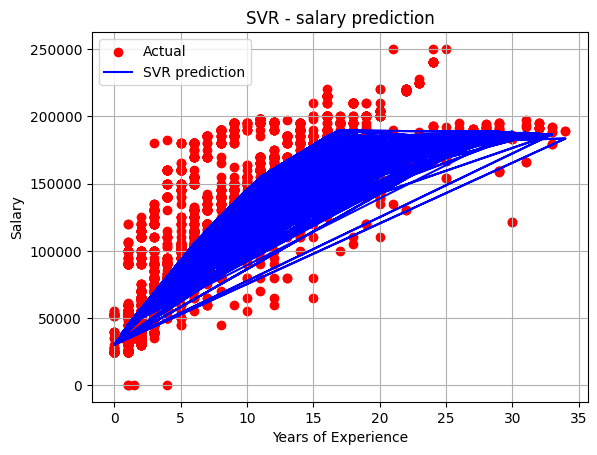

In [24]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color='red', label='Actual')
plt.plot(x,y_pred,color='blue', label='SVR prediction')
plt.title('SVR - salary prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()

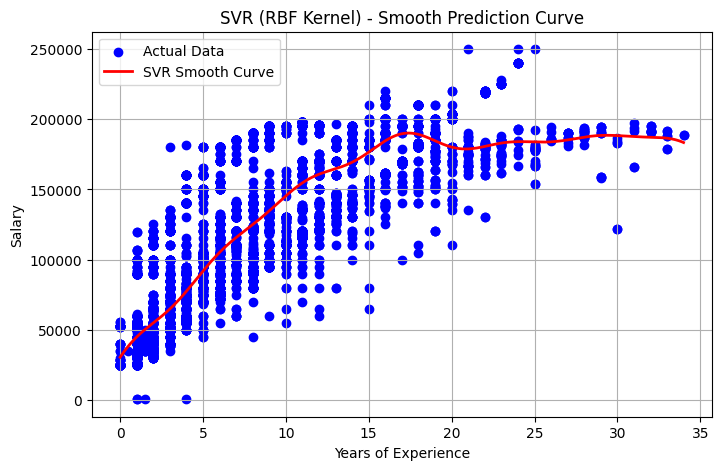

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x_grid = np.arange(min(x.ravel()),max(x.ravel()),0.01)
x_grid = x_grid.reshape(-1,1)

x_grid_scaled = sc_x.transform(x_grid)

y_grid_scaled = svr.predict(x_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

plt.figure(figsize=(8,5))
plt.scatter(x,y,color='blue', label='Actual Data')
plt.plot(x_grid,y_grid,color='red', label='SVR Smooth Curve', linewidth=2)
plt.title('SVR (RBF Kernel) - Smooth Prediction Curve')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()


# Evaluate Model Performance

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("RMSE:",rmse)
print("R2 score:",r2)

MSE: 759013901.8514212
RMSE: 27550.20692937571
R2 score: 0.7275580175081495


# compare kernals using code

Kernal: LINEAR| R2 Score: 0.6326


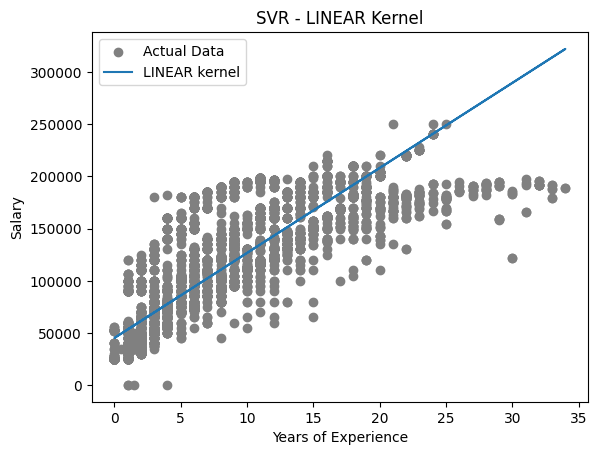

Kernal: POLY| R2 Score: -0.0216


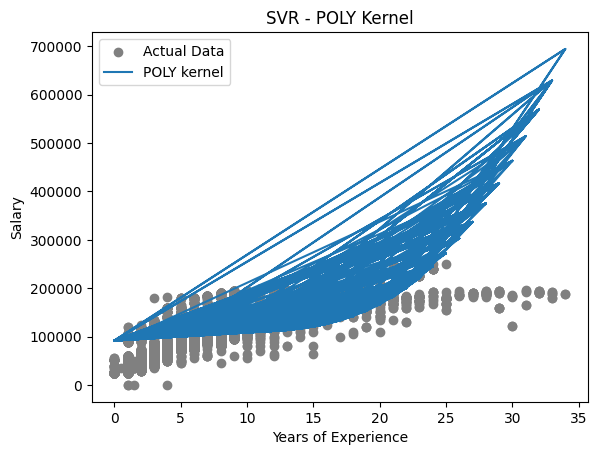

Kernal: RBF| R2 Score: 0.7249


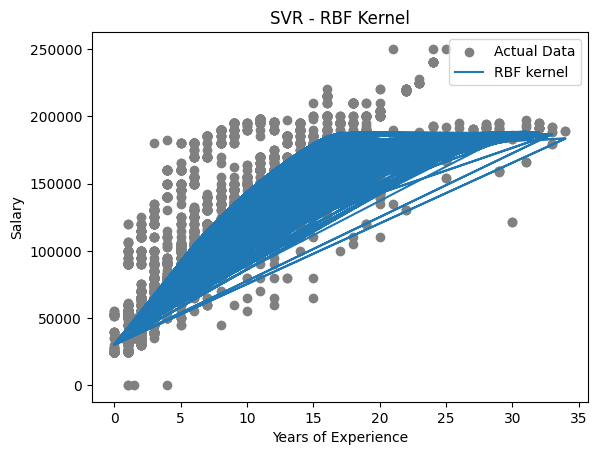

In [37]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  r2_score
import matplotlib.pyplot as plt

x = df[['Years of Experience']].values
y = df[['Salary']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y).ravel()

kernal = ['linear', 'poly', 'rbf']

for kernel in kernals:
    if kernal == 'poly':
        model = SVR(kernel=kernel, degree=2)
    else:
        model = SVR(kernel=kernel)

    model.fit(x_scaled, y_scaled)

    y_pred_scaled = model.predict(x_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    score = r2_score(y, y_pred)
    print(f"Kernal: {kernel.upper()}| R2 Score: {score:.4f}")


    plt.scatter(x, y, color='gray', label='Actual Data')
    plt.plot(x, y_pred, label=f'{kernel.upper()} kernel')
    plt.title(f"SVR - {kernel.upper()} Kernel")
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()


# Try Different C and epsilon Values

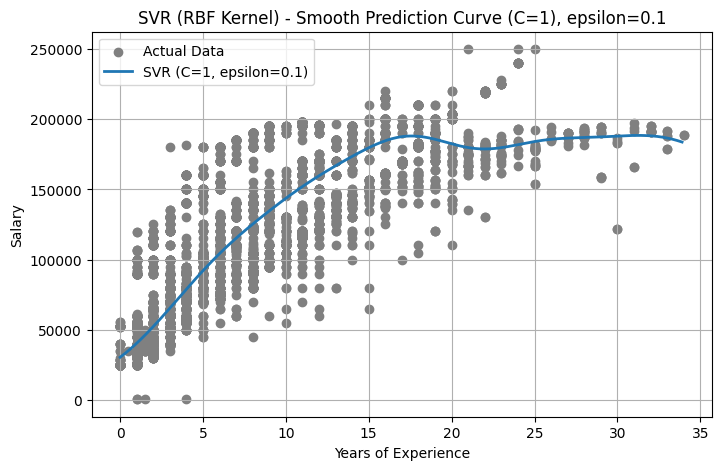

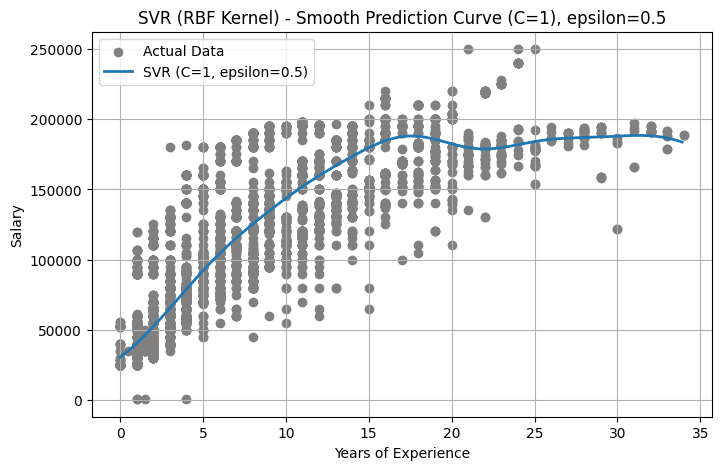

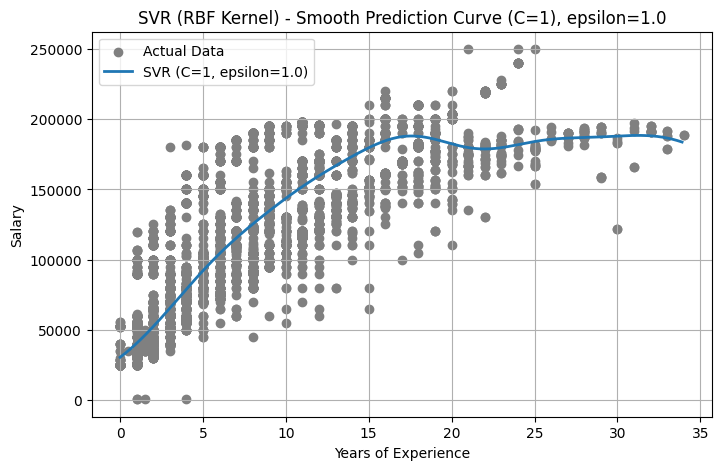

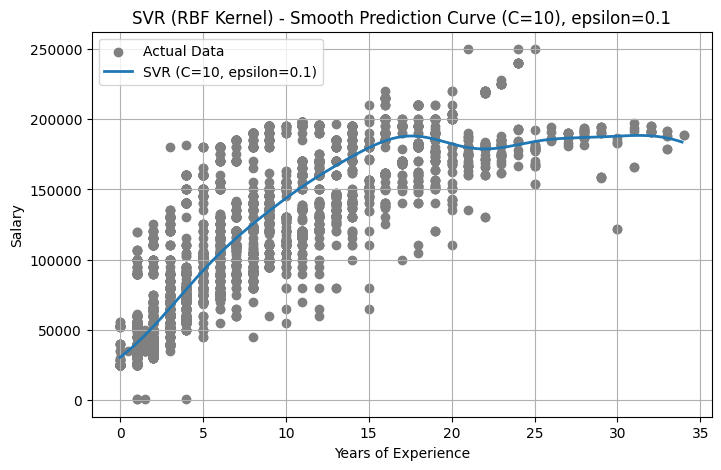

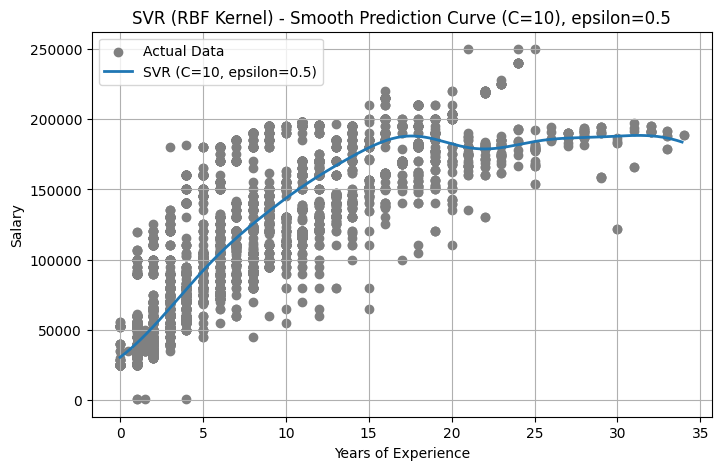

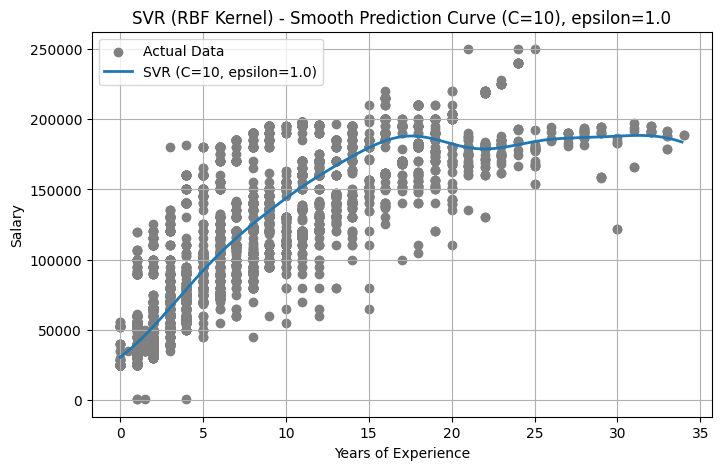

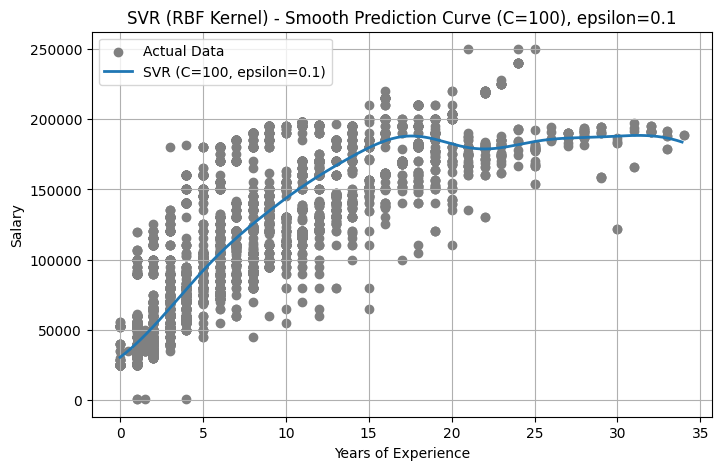

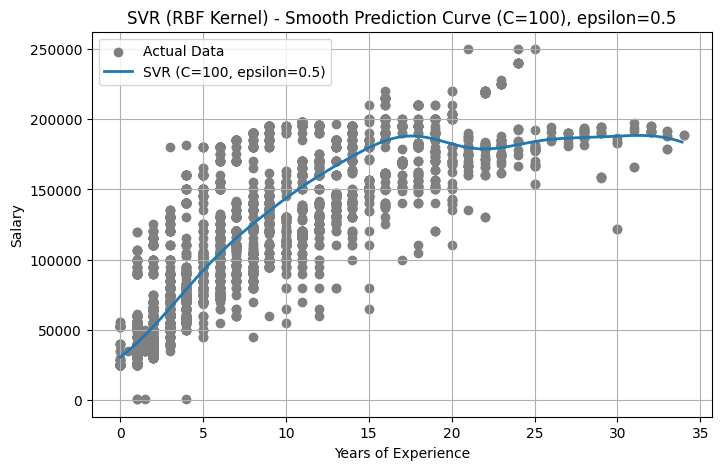

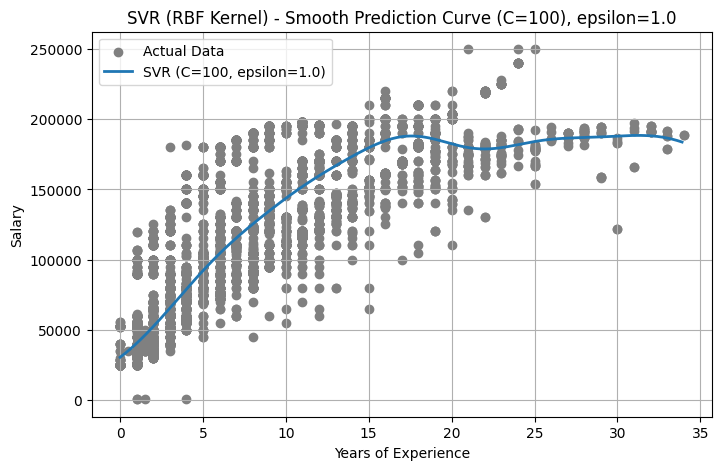

In [40]:
c_values = [1,10,100]
epsilon_values = [0.1,0.5,1.0]

x_grid = np.arange(min(x.ravel()),max(x.ravel()),0.1)
x_grid = x_grid.reshape(-1,1)

x_grid_scaled = sc_x.transform(x_grid)

for c in c_values:
    for eps in epsilon_values:
        svr = SVR(kernel='rbf',C=c,epsilon=eps)
        model.fit(x_scaled, y_scaled)

        y_grid_scaled = model.predict(x_grid_scaled)
        y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

        plt.figure(figsize=(8,5))
        plt.scatter(x,y,color='gray', label='Actual Data')
        plt.plot(x_grid,y_grid,label=f'SVR (C={c}, epsilon={eps})', linewidth=2)
        plt.title(f'SVR (RBF Kernel) - Smooth Prediction Curve (C={c}), epsilon={eps}')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary')
        plt.grid(True)
        plt.legend()
        plt.show()